In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random as random
import time
from matplotlib.animation import FuncAnimation


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

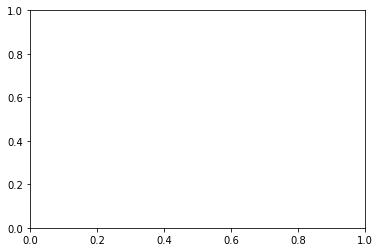

In [4]:
# x(T) = SX where S = [0,t^2][t,0]


def f (t,x):
    a= 2
    b =1 
    return np.dot(np.array([[0,1],[1 - x[0],0]]), x)  [0,0.5*np.cos(0.5*t)]
# def f (t,x):
    # return ((0.5*x * (1-x) )- (0.4*x) )
    
fig, ax = plt.subplots()

t_eval = np.linspace(0,100,5000)
sol = []
for i in range (1):    
    sol.append(solve_ivp(f,[0,100], [1,.5],t_eval=t_eval))
#     sol.append(solve_ivp(f,[0,100], [-2,0],t_eval=t_eval))
    
    ax.plot(sol[i].y[0],sol[i].y[1])
    
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)

# plt.show()


In [19]:
r = lambda: random.randint(0,255)

def deriv (t,x):
    a= 2
    b =1 
    return np.dot(np.array([[0,1],[2.5- x[0]**2,0]]), x) - [0,0.3*np.cos(0.5*t)]
    

t_eval = np.linspace(0,50,1000)
position = np.array([-2])
y = np.array([0])

dt = t_eval[1]- t_eval[0]
pixels = 2

colors = ['#%02X%02X%02X' % (r(),r(),r()) for i in range (pixels)]


for i in range (len(t_eval)):
    x_y = deriv(t_eval[i], [position[-1], y[-1]])
    position = np.append(position, position[-1] +  dt*  x_y[0] + 1/2 * dt**2 * x_y[-1])
    y = np.append(y,y[-1] + dt* x_y[1])
    plt.scatter(position[-1],y[-1],c = colors[0],marker=".", linewidths=1)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.pause(0.000001)
#     print(x[-1],y[-1])


plt.xlim(-4,4)
plt.ylim(-4,4)
# ax.plot(x,y)
# ax.set_ylim(-4,4)
# ax.set_xlim(-4,4)

# plt.show()


KeyboardInterrupt: 

In [ ]:
print("are you working?")

In [18]:
%matplotlib

Using matplotlib backend: MacOSX


velocity is 0.017123334339456796
Time is: 27426.399999881385
0.09999647065051849


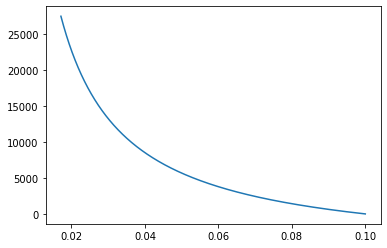

In [59]:
import numpy as np
import random
import math
#import matplotlib.pyplot as plt
hasEnergy = True
E = 20000 #kJ
D = 10000 #m
g = 9.81 #m/s^2
x = 0 #m
dt = 0.1 #sec


E_ = [E]
X_ = [0]
F_ = [0]
P_ = [0]
V_ = [0.1]
T_ = [0]


G = 0
M = 85 #kg
mu = 0.02
v = 0.1 #m/s
A = 0.5 #m^2
ρ = 1.2 #kg/m^3
Cd = 0.5
Constant = Cd*A*ρ
Pmax = 75

def F(x, v):
# 	print (-((g * math.sin(math.atan(G)) * M) + (g * math.sin(math.atan(G)) * M * mu) + (0.5 * Constant * v**2)))

	return -((g * math.sin(math.atan(G)) * M) + (g * math.sin(math.atan(G)) * M * mu) + (0.5 * Constant * v**2))

def sigmoid(z, Pmax):
    return 1/(1+np.exp(-10*(z-Pmax)))
    
def pd(x):
	return 70

def p(x):
	if hasEnergy:
		return pd(x) - sigmoid(pd(x),Pmax)*pd(x)
	return 0

while X_[-1] < D:
	F_.append(F(X_[-1],V_[-1]))
	P_.append(p(X_[-1]))
	power_gain = math.sqrt((2*P_[-1]*dt)/(M))
	friction_loss = (F(X_[-1],V_[-1])/M )* dt 
	V_.append(V_[-1] + friction_loss)
	X_.append(X_[-1]+V_[-1])
	E_.append(E_[-1] - pd(X_[-1])*dt)
	T_.append(T_[-1]+dt)

	if E_[-1] <= 0 and not hasEnergy:
		print("Energy is gone")
		hasEnergy = False 
	if V_[-1] <= 0:
		print ("Stopped after energy is gone")
		break

print("velocity is", V_[-1])
print ("Time is:", T_[-1])

#plt.plot(V_,T_)
# print("velocity", V_[-1])

plt.plot(V_,T_)
# plt.plot (E_,T_)
# print("velocity", V_[-1])
# plt.plot(T_,X_)
# print("velocity", V_[-1])
# print (T_[-1])

1.9165304268846504
2.339089963258928
2.8707716098862965
3.325063770067871
3.743530197174005
4.130977176622371
4.493399481149258
4.834939929817313
5.158748940361026
5.4672691287105755
5.762437692314581
6.045819894080623
6.318700894474017
6.582150598066384
6.837070543398949
7.084228520510402
7.324284602480779
7.55781104353316
7.7853077132386215
8.007214227018597
8.223919594319593
8.43576997584949
8.64307498225661
8.846112834837088
9.045134629037486
9.240367883721413
9.432019516768172
9.62027835608991
9.80531727151771
9.987294995076445
10.166357683434223
10.342640265697334
10.516267611448168
10.687355547423875
10.856011746089388
11.022336505258508
11.186423434627606
11.348360062431285
11.508228373273274
11.666105286425337
11.822063082441765
11.976169784744867
12.128489501848527
12.27908273506401
12.428006655843927
12.575315356342367
12.721060076281917
12.865289408805944
13.008049487644323
13.149384157622297
13.289335130286968
13.427942126206945
13.565243005312343
13.701273886479763
13.836

44.802208206297486
44.84583263348136
44.889415628968884
44.93295731054626
44.97645779544274
45.01991720033435
45.063335641347486
45.10671323406259
45.150050093517685
45.19334633421197
45.236602070109306
45.27981741464177
45.32299248071306
45.36612738070198
45.40922222646582
45.452277129343756
45.4952922001602
45.53826754922812
45.58120328635232
45.624099520832765
45.66695636146777
45.70977391655724
45.75255229390586
45.79529160082625
45.83799194414212
45.88065343019136
45.92327616482914
45.96586025343098
46.00840580089577
46.0509129116488
46.09338168964472
46.13581223837054
46.178204660848536
46.22055905963919
46.26287553684408
46.30515419410872
46.34739513262545
46.38959845313624
46.43176425593547
46.473892640872755
46.51598370735565
46.558037554352424
46.600054280394744
46.6420339835804
46.68397676157593
46.72588271161931
46.76775193052258
46.8095845146744
46.8513805600427
46.89314016217721
46.93486341621203
46.97655041686813
47.018201258455875
47.05981603487751
47.10139483962961
47.

62.31819576128316
62.34976650910506
62.38132153912743
62.412860874798774
62.44438453950937
62.47589255659147
62.50738494931946
62.538861740910114
62.57032295452277
62.60176861325953
62.63319874016544
62.66461335822873
62.69601249038096
62.72739615949726
62.7587643883965
62.790117199841475
62.82145461653912
62.852776661140695
62.884083356241966
62.915374724383405
62.94665078805037
62.97791156967331
63.00915709162794
63.04038737623542
63.07160244576257
63.102802322422015
63.1339870283724
63.16515658571858
63.19631101651175
63.2274503427497
63.25857458637693
63.289683769284885
63.3207779133121
63.35185704024438
63.382921171815
63.41397032970486
63.44500453554267
63.47602381090514
63.50702817731712
63.5380176562518
63.5689922691309
63.59995203732479
63.63089698215271
63.661827124882926
63.69274248673289
63.72364308886942
63.754528952408876
63.785400098417306
63.81625654791064
63.847098321854844
63.87792544116607
63.908737926710856
63.93953579930627
63.97031907972006
64.00108778867086
64.03

76.43895035616737
76.46476854184596
76.49057812833202
76.51637912421121
76.54217153805492
76.56795537842025
76.59373065385014
76.61949737287335
76.64525554400447
76.67100517574399
76.69674627657832
76.72247885497984
76.74820291940689
76.77391847830384
76.79962554010112
76.82532411321523
76.8510142060488
76.8766958269906
76.90236898441556
76.92803368668486
76.9536899421459
76.97933775913236
77.00497714596423
77.03060811094782
77.05623066237584
77.08184480852736
77.10745055766792
77.1330479180495
77.1586368979106
77.1842175054762
77.20978974895789
77.2353536365538
77.26090917644869
77.286456376814
77.31199524580781
77.3375257915749
77.36304802224684
77.38856194594193
77.41406757076527
77.4395649048088
77.46505395615132
77.4905347328585
77.51600724298297
77.54147149456426
77.56692749562892
77.59237525419046
77.61781477824947
77.64324607579358
77.66866915479756
77.69408402322323
77.71949068901962
77.74488916012294
77.77027944445659
77.79566154993121
77.82103548444474
77.84640125588237
77.8

88.57957150530365
88.60189246104378
88.62420785912374
88.64651770369252
88.66882199889393
88.69112074886661
88.71341395774408
88.73570162965473
88.75798376872181
88.78026037906349
88.80253146479279
88.82479703001766
88.84705707884096
88.86931161536046
88.89156064366887
88.91380416785383
88.93604219199793
88.95827472017871
88.98050175646868
89.00272330493534
89.02493936964115
89.04714995464356
89.06935506399503
89.09155470174302
89.11374887193001
89.13593757859351
89.15812082576606
89.18029861747524
89.20247095774369
89.22463785058906
89.24679930002415
89.26895531005678
89.29110588468987
89.31325102792142
89.33539074374457
89.3575250361475
89.3796539091136
89.4017773666213
89.42389541264423
89.44600805115111
89.46811528610586
89.49021712146751
89.51231356119031
89.53440460922364
89.55649026951211
89.57857054599548
89.60064544260874
89.62271496328206
89.64477911194088
89.6668378925058
89.68889130889269
89.71093936501268
89.7329820647721
89.75501941207258
89.77705141081101
89.799078064879

98.39965552339112
98.4197722453764
98.43988489856586
98.45999348542722
98.48009800842567
98.50019847002392
98.52029487268217
98.54038721885819
98.56047551100721
98.58055975158204
98.60063994303299
98.62071608780789
98.64078818835213
98.66085624710863
98.68092026651783
98.70098024901775
98.72103619704393
98.74108811302948
98.76113599940506
98.78117985859889
98.80121969303674
98.82125550514198
98.8412872973355
98.8613150720358
98.88133883165894
98.90135857861857
98.92137431532592
98.9413860441898
98.9613937676166
98.98139748801033
99.00139720777257
99.02139292930252
99.04138465499697
99.06137238725033
99.0813561284546
99.10133588099941
99.12131164727201
99.14128342965724
99.16125123053759
99.18121505229317
99.20117489730171
99.2211307679386
99.24108266657684
99.26103059558709
99.28097455733761
99.30091455419436
99.32085058852093
99.34078266267854
99.36071077902609
99.38063493992016
99.40055514771494
99.42047140476231
99.44038371341183
99.46029207601073
99.48019649490391
99.50009697243392

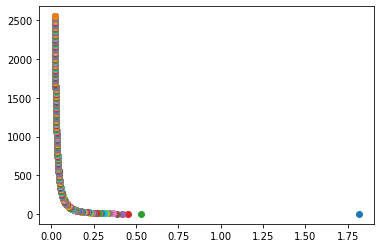

In [66]:
Emax = 10
Pmax = 10
distance = 100
b = 1
c = 1
g = 1

def sigmoid(z):
    return 1/(1+np.exp(-10*(z-Pmax)))

def Pd(x):
    return 20

def P(x):
    return Pd(x) - sigmoid(Pd(x))*.9*Pd(x)

def F(x, v):
    return b*v + c + g*x

x=0.1
v=.001
t=0
dt = 1
while x < distance:
    f = F(x,v)
    p = P(x)
    v = p/f
    x += v*dt
    t += dt
    plt.scatter(v,t)
    print (x)
print(t)

In [ ]:
%matplotlib

In [ ]:
print("kx")

In [124]:
import numpy as np
import random
import math
#import matplotlib.pyplot as plt
hasEnergy = True
E = 2000 #kJ
D = 10000 #m
g = 9.81 #m/s^2
x = 0 #m


E_ = [E,E]
X_ = [0.0, 0.001 ]
F_ = [0,0]
P_ = [0,0]
V_ = [0.0,0.1]
T_ = [0,0]

G = 0
M = 85 #kg
mu = 0.02
v = 0.1 #m/s
A = 5 #m^2
ρ = 1.2 #kg/m^3
Cd = 0.5
Constant = Cd*A*ρ
Pmax = 75

def F(x, v):
	return -((g * math.sin(math.atan(G)) * M) + (g * math.sin(math.atan(G)) * M * mu) + (0.3 * Constant * v**2 + 0.2 * Constant * v ))

def W(x):
	return x

# def p(x):
# 	if hasEnergy:
# 		return pd(x) #- sigmoid(pd(x),Pmax)*pd(x)
# 	return 0
dt = .000001 #sec

while X_[-1] < D:
    delta_x = X_[-1] - X_[-2]
    
    V_.append(math.sqrt(V_[-1]**2 + 2/M * (W(X_[-1]) + F(X_[-1],V_[-1])*delta_x)))
    
    X_.append(X_[-1] + V_[-1]*dt)
    T_.append(T_[-1]+dt)
print (len(T_))
print(T_[-1])
# plt.plot(W_,X_)

7035324
7.0353220006294785


In [125]:
import numpy as np
import random

def taylor(x,c):
    return c[0]+c[1]*x+c[2]*x**2+c[3]*x**3

def sigmoid(z):
    return 1/(1+np.exp(-10*(z-Pmax)))

def Pd(x,c):
    return taylor(x,c)

def P(x,c):
    return Pd(x,c) - .95*sigmoid(Pd(x,c))*Pd(x,c)

def F(x, v):
    return b*v + C + g*x

Emax = 4
Pmax = 10
distance = 1
b = 1
C = 1
g = 1

bestcoeffs = 'none'
bestt = 100
ncoef = 4
attempt = 1
while attempt <= 10000:
    print(attempt)
    c = [random.uniform(0,20)]
    while len(c) < ncoef:
        rand = random.uniform(-20,20)
        c.append(rand)
    x = .001
    v = .001
    E = 0
    t=0
    dt = .01
    stopped = False
    noE = False
    while x < distance:
        f = F(x,v)
        p = P(x,c)
        v = p/f
        x += v*dt
        E += Pd(x,c)*dt
        t += dt
        if v == 0:
            stopped = True
            break
        if E > Emax:
            noE = True
            break
        if t > bestt:
            break
    if (t < bestt) and (not stopped) and (not noE):
        bestt = t
        bestv = v
        bestcoeffs = c
    attempt += 1

print(bestcoeffs)
print(bestt)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234


4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230


6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218


8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235


9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
[9.166001086715783, -4.453243057004549, 13.580602644348772, -9.853964352230511]
0.4000000000000002
